<a href="https://colab.research.google.com/github/GODWILL363/gdp-dashboard/blob/main/fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [5]:
# 3
# Cell 3: Create image generators
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

test_data_gen = test_image_generator.flow_from_directory(
    directory=PATH,
    classes=['test'],
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,
    class_mode=None,
    shuffle=False
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


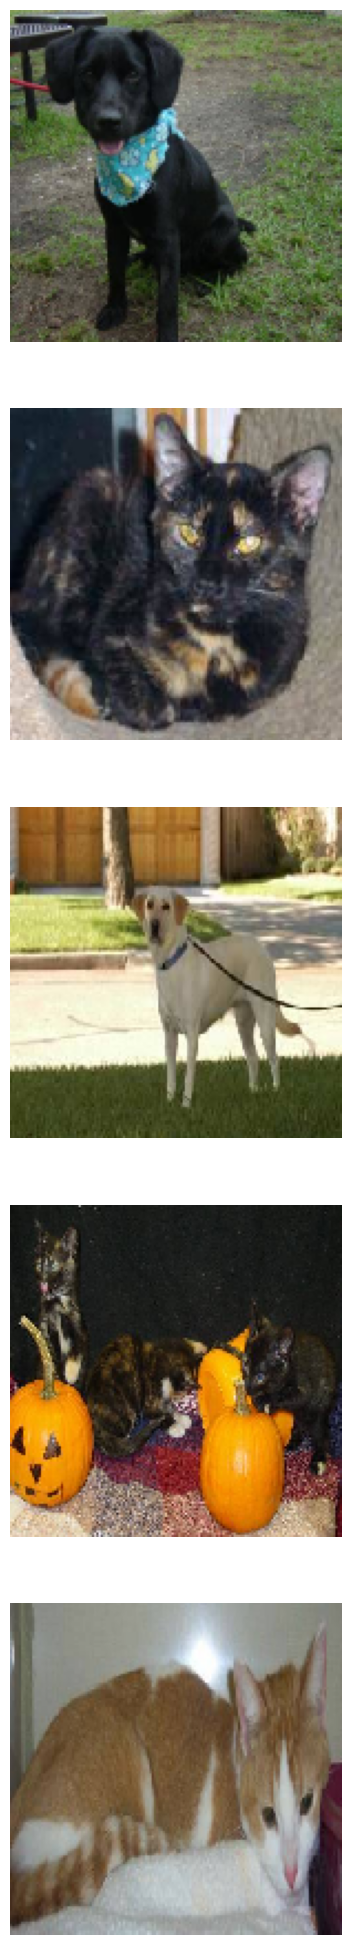

In [6]:
# 4
def plotImages(images_arr, probabilities=False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,5*len(images_arr)))
    if not isinstance(axes, np.ndarray):
        axes = [axes]
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.show()

train_images, _ = next(train_data_gen)
plotImages(train_images[:5])


In [7]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


Found 2000 images belonging to 2 classes.


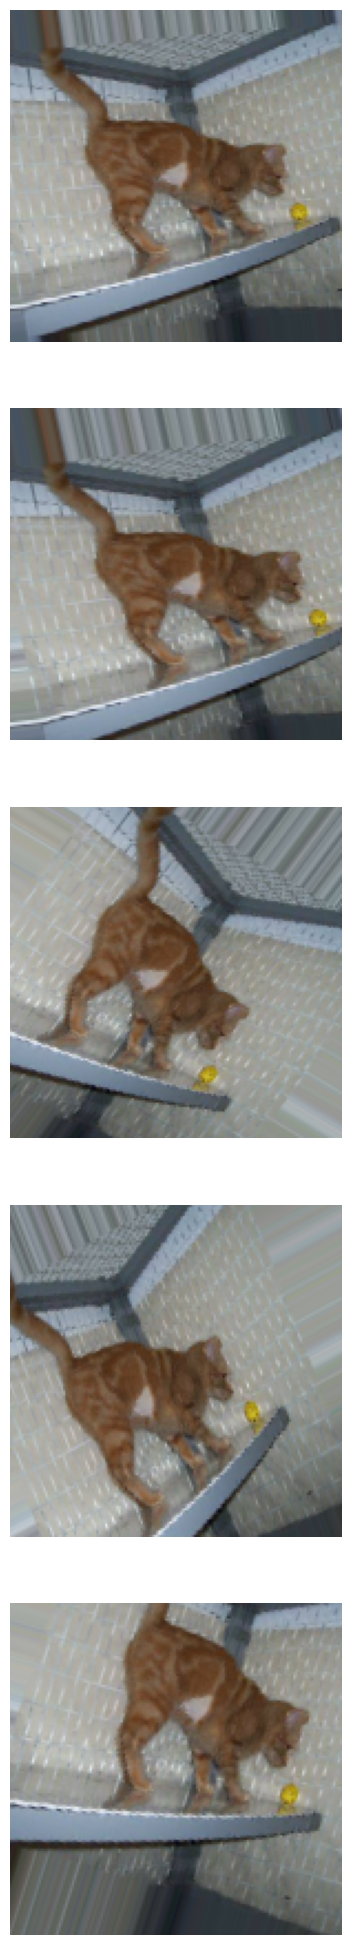

In [9]:
# 6
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

augmented_images = [train_data_gen[0][0][0] for _ in range(5)]
plotImages(augmented_images)

In [10]:
# 7
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)



In [13]:
# 8
EPOCHS = 15
history = model.fit(
    train_data_gen,
    epochs=EPOCHS,
    validation_data=val_data_gen,
)

Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 117s 7s/step - accuracy: 0.5379 - loss: 0.6879 - val_accuracy: 0.6000 - val_loss: 0.6756
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 117s 7s/step - accuracy: 0.5947 - loss: 0.6790 - val_accuracy: 0.6060 - val_loss: 0.6640
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 117s 7s/step - accuracy: 0.6307 - loss: 0.6526 - val_accuracy: 0.6500 - val_loss: 0.6363
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 116s 7s/step - accuracy: 0.6628 - loss: 0.6384 - val_accuracy: 0.6760 - val_loss: 0.5989
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 123s 8s/step - accuracy: 0.6590 - loss: 0.6265 - val_accuracy: 0.7020 - val_loss: 0.5943
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 116s 7s/step - accuracy: 0.6659 - loss: 0.6117 - val_accuracy: 0.6780 - val_loss: 0.5847
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 116s 7s/step - accuracy: 0.6545 - loss: 0.6122 - val_accuracy: 0.6750 - val_loss: 0.5883
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 116s 7s/step - accuracy: 0.6731 - loss: 0.6084 - val_accuracy: 0.7180 - v

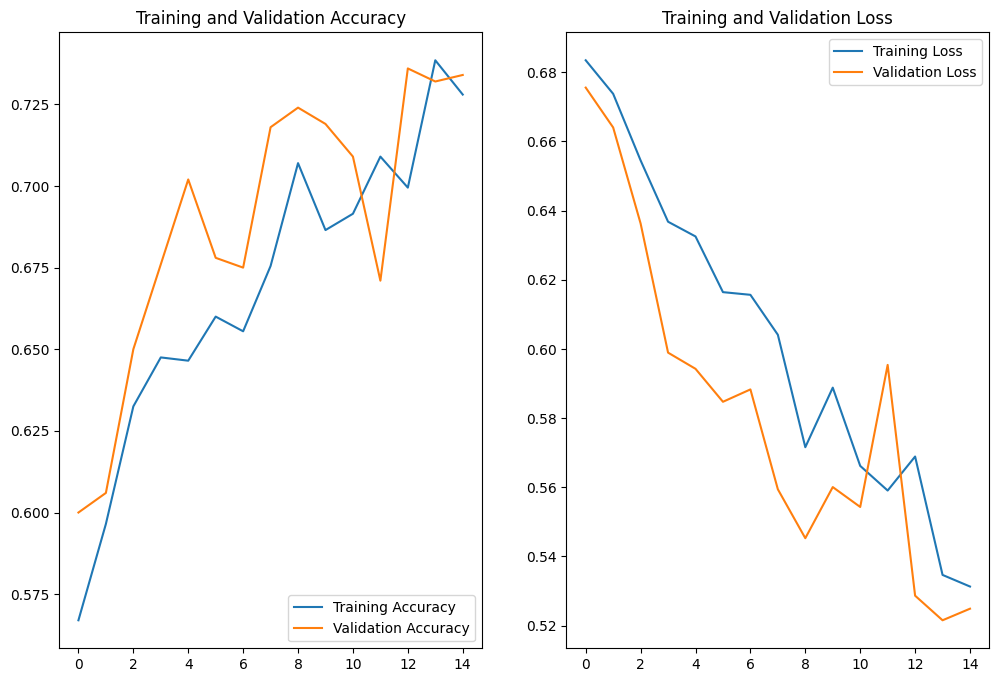

In [14]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
# 10
test_data_gen.reset()
probabilities = model.predict(test_data_gen, steps=test_data_gen.samples)
probabilities = [p[0] for p in probabilities]

test_images = next(test_data_gen)[0]
plotImages(test_images, probabilities)

 1/50 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [16]:
# 11
val_accuracy = history.history['val_accuracy'][-1]
print(f"Validation accuracy: {val_accuracy*100:.2f}%")
if val_accuracy >= 0.7:
    print("You passed the challenge!")
elif val_accuracy >= 0.63:
    print("You passed the challenge with minimum accuracy!")
else:
    print("Keep trying! Your model didn't reach 63% accuracy.")


Validation accuracy: 73.40%
You passed the challenge!
